cycle is of length $L$
terminal reward is $r$

$$V(s1) = \mathbb{E}[\sum_{t=1}^{\infty} \gamma^{t-1} r_t]$$

$$V(s1) = r\sum_{t=1}^{\infty}\gamma^{Lt-1} = \frac{r\gamma^{L-1}}{1-\gamma^L}$$

$$\frac{5\gamma^{4}}{1-\gamma^5} < \frac{20\gamma^{9}}{1-\gamma^{10}}$$

$$ x=\gamma^5 $$

$$3x^2 - 4x + 1 > 0$$

$\gamma^5 > 1/3$

Average value function

$$ V(s) = \lim_{T\rightarrow +\infty} \frac{1}{T} \mathbb{E}[\sum_{t=1}^T r_t]$$

$$ V(s) = \lim_{T\rightarrow +\infty} \frac{1}{LT} \mathbb{E}[\sum_{t=1}^{LT} r_t]$$

$$ V(s) = \lim_{T\rightarrow +\infty} \frac{1}{LT} Tr = \frac{r}{L}$$

In [18]:
(1/3) ** (1/5)


0.8027415617602307

In [1]:
from IPython.core.display import HTML, Image
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

# Practical Session - Model-based RL

In [2]:
import numpy as np
import gym
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from environments.RegisterEnvironments import registerWorlds
from learners.Generic.Random import Random
from learners.Generic.Human import Human
# from learners.discreteMDPs.Qlearning import Qlearning
# from learners.discreteMDPs.OptimalControl import OptimalControl
# from learners.discreteMDPs.UCRL2 import UCRL2
# from learners.discreteMDPs.UCRL2_5 import UCRL2_5
# from learners.discreteMDPs.UCRL3 import UCRL3

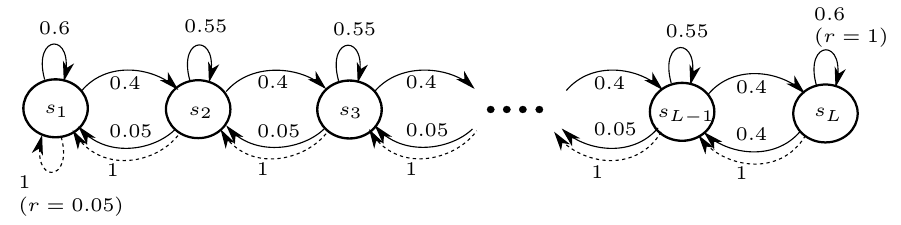

In [19]:
Image(filename='river_swim.png') 

### Question 1

Is this MDP communicating? Irreducible? What is its diameter? What do you think is the optimal policy?

Communicating yes, irreducible no (e.g policy "always left" cannot reach states to the right of the initial state).

Its diameter is approximately $L/p$ where $p=0.4$.

The optimal policy should be "always go right".

## Register custom "River Swim" Gym environment

(Environment already registered)


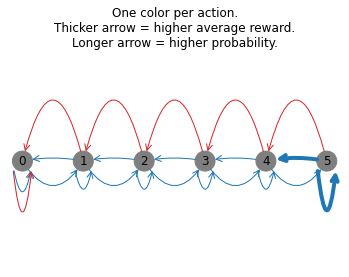

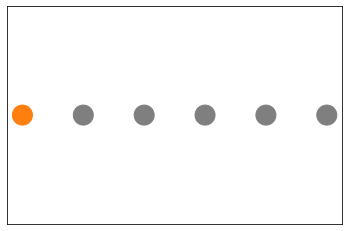

In [20]:
N_STATES = 6
# N_STATES = 25

try:
    env_name = registerWorlds['river-swim-' + str(N_STATES)](0)
except:
    print('(Environment already registered)')
    env_name = 'RiverSwim-' + str(N_STATES) + '-v0'
    
env = gym.make(env_name)

env.render(layout='linear' if N_STATES == 6 else 'spring')

## Your turn to play!

In [21]:
def run(env, learners, horizon, render=False, verbose=True):
    cumrewards = np.zeros((horizon, len(learners)))
    
    for i, learner in enumerate(learners):
        observation = env.reset()
        learner.reset(observation)
        if verbose:
            print('Initial state: {}'.format(observation))
            print('New initialization of {:s}'.format(learner.name))

        cumreward = 0.
        for t in tqdm(range(horizon), disable=not verbose):
            state = observation
            if render:
                env.render(layout='linear')
            try:
                action = learner.play(state)  # Get action
            except ValueError as e:
                if verbose:
                    print(e)
                break
            observation, reward, done, info = env.step(action)
            learner.update(state, action, reward, observation)
            cumreward += reward
            cumrewards[t, i] = cumreward

            if done:
                if verbose:
                    print("Episode finished after {} timesteps".format(t + 1))
                break
    
    return cumrewards[:t + 1, :], learners

Initial state: 0
New initialization of Human


  0%|          | 0/10 [00:00<?, ?it/s]

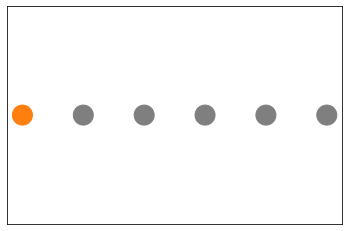

Current state is:  0
Please choose an action in the following list (confirm with entry):  ['R', 'L']
R
Chosen action is:  R


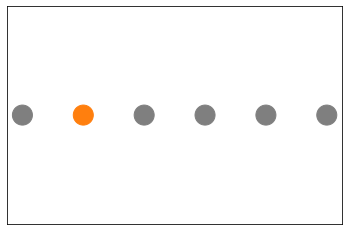

Current state is:  1
Please choose an action in the following list (confirm with entry):  ['R', 'L']
R
Chosen action is:  R


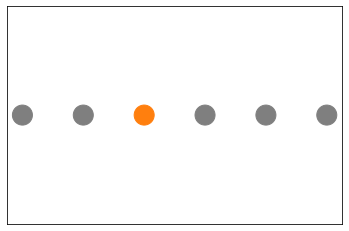

Current state is:  2
Please choose an action in the following list (confirm with entry):  ['R', 'L']
R
Chosen action is:  R


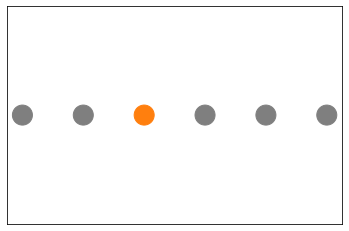

Current state is:  2
Please choose an action in the following list (confirm with entry):  ['R', 'L']
R
Chosen action is:  R


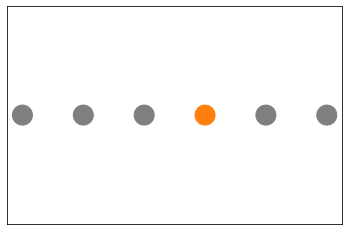

Current state is:  3
Please choose an action in the following list (confirm with entry):  ['R', 'L']
q
Wrong input, quitting...


In [22]:
learner_human = Human(env)
_ = run(env, [learner_human], 10, render=True)

## Question 2

Complete the value iteration scheme in *learners/discreteMDPs/OptimalControl.py*.

For different values of the discount factor $\gamma$, display the list of VI errors between consecutive iterates. What do you observe? Try with $\gamma=1$. 

Similarly, display the optimal control policy for different values of $\gamma$. Does that match your prediction of Question 1?

Compute the span of each value function iterates during the VI scheme. Compare it to the (approximated) diameter of the MDP. Comment.

In [7]:
learner_opt = OptimalControl(env, gamma=0.99)
learner_opt.policy

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

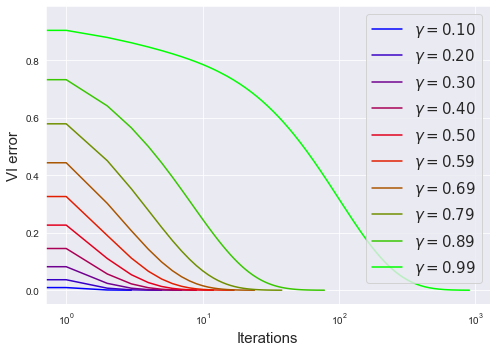

gamma=0.10
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.20
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.30
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.40
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.50
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.59
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.69
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.79
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.89
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 

gamma=0.99
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 



In [8]:
gammas = np.linspace(0.1, 0.99, 10)
err_sto = []
policies_sto = []
# err_det = []
# policies_det = []

for gamma in gammas:
    learner_opt_sto = OptimalControl(env, gamma=gamma, stochastic_policy=True)
    err_sto.append(np.max(np.abs(learner_opt_sto.v_history[1:, :] - learner_opt_sto.v_history[:-1, :]), axis=1))
    policies_sto.append(learner_opt_sto.policy)
    
#     learner_opt_det = OptimalControl(env, gamma=gamma, stochastic_policy=False)
#     err_det.append(np.max(np.abs(learner_opt_det.v_history[1:, :] - learner_opt_det.v_history[:-1, :]), axis=1))
#     policies_det.append(learner_opt_det.policy)
    
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    colors = plt.cm.brg(np.linspace(0, 1, len(gammas)))

    for i, gamma in enumerate(gammas):
        ax.semilogx(err_sto[i], label='$\gamma={:.2f}$'.format(gamma), color=colors[i])
#         ax.semilogx(err_det[i], linestyle='dashed', label='$\gamma={:.2f}$'.format(gamma), color=colors[i])
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_xlabel('Iterations', fontsize=15)
    ax.set_ylabel('VI error', fontsize=15)

    plt.tight_layout()
    plt.show()
    
_ = [print('gamma={:.2f}\n'.format(gamma), policy, '\n') for gamma, policy in zip(gammas, policies_sto)]
# _ = [print('gamma={:.2f}\n'.format(gamma), policy, '\n') for gamma, policy in zip(gammas, policies_det)]

No handles with labels found to put in legend.


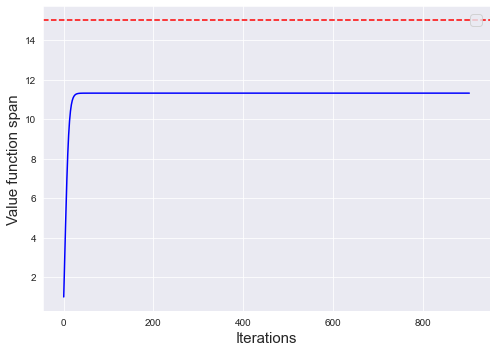

In [9]:
learner_opt = OptimalControl(env, gamma=0.99)
spans = np.max(learner_opt.v_history, axis=1) - np.min(learner_opt.v_history, axis=1)
D = env.nS / 0.4

with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    ax.plot(spans, color='blue')
    ax.axhline(y=D, linestyle='dashed', color='red')
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_xlabel('Iterations', fontsize=15)
    ax.set_ylabel('Value function span', fontsize=15)

    plt.tight_layout()
    plt.show()

## Question 3
 
Complete the Qlearning algorithm in *learners/discreteMDPs/Qlearning.py* with $\epsilon$-greedy exploration.

Does it seem to converge to the optimal policy? Try different values of $\epsilon$.

The Q function was initialized as $\forall s\in\mathcal{S}, a\in\mathcal{A},\ Q(s, a)=0$. Does the theory support another choice of initialization? Can you suggest one based on the optimistic principle? Compare the performances with the previous initialization.

In [10]:
gamma = 0.99
learner_q = Qlearning(env, gamma=gamma, init_Q=1. / (1. - gamma), epsilon=0.01)

HORIZON = int(5e4)
cumrewards, learners = run(env, [learner_q], HORIZON)
learner_q = learners[0]

Initial state: 0
New initialization of Q-learning


  0%|          | 0/50000 [00:00<?, ?it/s]

In [11]:
learner_q.policy

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Question 4

Recall the definition of the average gain.

Implement a function to compute the sample regret from an array of cumulative rewards.
By sample regret, we mean that if we run $N$ independent episodes and observe a sample regret $r^n_T$, then $\frac{1}{N}\sum_{n=1}^N r^n_T$ converges to the true average regret at horizon $T$.

In [12]:
def regret(cumrewards, oracle_idx=0):
    horizon = cumrewards.shape[0]
    n_learners = cumrewards.shape[1]
    oracle_gain = cumrewards[-1, oracle_idx] / horizon
    return np.repeat(oracle_gain * np.linspace(1, horizon, horizon).reshape(-1, 1), n_learners, axis=1) - cumrewards

In [13]:
def xp(env, learners, horizon, n_episodes, oracle_idx=0, plot=True):
    regrets = np.zeros((horizon, len(learners), n_episodes))
    for i in tqdm(range(n_episodes)):
        cumrewards, _ = run(env, learners, horizon, verbose=False)
        regrets[:, :, i] = regret(cumrewards, oracle_idx)
    
    median = np.median(regrets, axis=2)
    quantile_10 = np.quantile(regrets, 0.1, axis=2)
    quantile_90 = np.quantile(regrets, 0.9, axis=2)

    if plot:
        with sns.axes_style('darkgrid'):
            fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

            tt = np.linspace(1, horizon, horizon)
            colors = plt.cm.brg(np.linspace(0, 1, len(learners)))

            for i, learner in enumerate(learners):
                if i != oracle_idx:
                    ax.plot(tt, median[:, i], label=learner.name, color=colors[i])
                    ax.fill_between(tt, quantile_10[:, i], quantile_90[:, i], alpha=0.3, color=colors[i])
            ax.legend(loc='upper left', prop={'size': 15})
            ax.set_xlabel('Time', fontsize=15)
            ax.set_ylabel('Cumulative regret', fontsize=20)

            plt.tight_layout()
            plt.show()

    return median, quantile_10, quantile_90

## Question 5

Check the regret of Qlearning for various initialization. Does this algorithm really solve the average reward problem?

  0%|          | 0/5 [00:00<?, ?it/s]

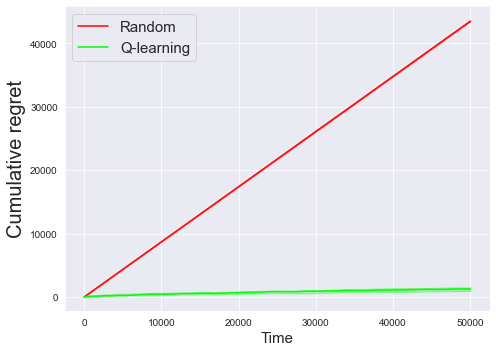

In [14]:
learner_opt = OptimalControl(env)
learner_random = Random(env)
learner_q = Qlearning(env, init_Q=1. / (1. - gamma), epsilon=0.01)

learners = [
    learner_opt,
    learner_random,
    learner_q,
]

HORIZON = int(5e4)
N_EPISODES = 5

median_regret, quantile_10_regret, quantile_90_regret = xp(env, learners, HORIZON, N_EPISODES, oracle_idx=0, plot=True)

## Question 6

Recall the principle of UCRL2.

Complete the implementation of UCRL2 in *learners/discreteMDPs/UCRL2.py*. 

Details can be found in the article *jaksch10a.pdf*.

  0%|          | 0/5 [00:00<?, ?it/s]

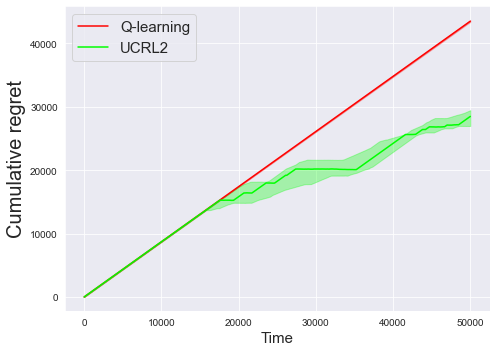

In [15]:
HORIZON = int(5e4)
N_EPISODES = 5
delta = 0.05

learner_q = Qlearning(env)
learner_ucrl2 = UCRL2(env, delta)

learners = [
    learner_opt,
    learner_q,
    learner_ucrl2,
]

median_regret, quantile_10_regret, quantile_90_regret = xp(env, learners, HORIZON, N_EPISODES, oracle_idx=0, plot=True)

## Question 7

UCRL2 relies on crude confidence bounds for rewards and transition probabilities. Among other improvements, UCRL3 uses sharper confidence bounds. In *learners/discreteMDPs/UCRL2_5.py* you will find a slightly modified copy of *UCRL2.py*. Try to implement the confidence bound of UCRL3 for the **reward** (transition probabilities are bit trickier) in UCRL2.5. Compare to UCRL2 and UCRL3.

  0%|          | 0/5 [00:00<?, ?it/s]

/home/sauxpa/Scool/TA/reinforcement-learning-class/2022/PracticalSession/TD5 - Model Based/answers/learners/discreteMDPs/UCRL2_5.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(2 * (1 + 1 / n) / n * np.log(np.sqrt(n + 1) / delta))
/home/sauxpa/Scool/TA/reinforcement-learning-class/2022/PracticalSession/TD5 - Model Based/answers/learners/discreteMDPs/UCRL2_5.py:86: RuntimeWarning: invalid value encountered in double_scalars
  2 * self.M2[s, a] / self.Nk[s, a] / self.Nk[s, a] * self.l_peeling(self.Nk[s, a], self.delta / self.nA / self.nS)
/home/sauxpa/Scool/TA/reinforcement-learning-class/2022/PracticalSession/TD5 - Model Based/answers/learners/discreteMDPs/UCRL2_5.py:73: RuntimeWarning: divide by zero encountered in log
  np.log(n) * np.log(self.eta * n) / np.log(self.eta) ** 2 / delta
/home/sauxpa/Scool/TA/reinforcement-learning-class/2022/PracticalSession/TD5 - Model Based/answers/learners/discreteMDPs/UCRL3.py:297: RuntimeWarning: invalid value en

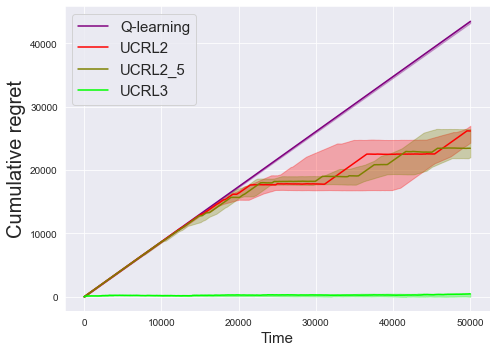

In [16]:
HORIZON = int(5e4)
N_EPISODES = 5
delta = 0.05

learner_q = Qlearning(env)
learner_ucrl2 = UCRL2(env, delta)
learner_ucrl2_5 = UCRL2_5(env, delta)
learner_ucrl3 = UCRL3(env, delta)

learners = [
    learner_opt,
    learner_q,
    learner_ucrl2,
    learner_ucrl2_5,
    learner_ucrl3,
]

median_regret, quantile_10_regret, quantile_90_regret = xp(env, learners, HORIZON, N_EPISODES, oracle_idx=0, plot=True)

## Bonus: confidence bounds

Many algorithms in ML rely on estimating the uncertainty of a prediction. In particular in RL and bandits, we are interested in knowing a range in which rewards and/or transition probabilities are likely to be, for instance to design optimistic algorithms. In this exercise, we will derive some classical confidence bounds used in e.g UCB and UCRL.

### 1 (Chernoff)
Let $X_1, \dots, X_n$ i.i.d real.valued random variables with $\mathbb{E}[X]=0$. We say that $X$ is $R$-sub-Gaussian if $\forall \lambda\in\mathbb{R}, \mathbb{E}[e^{\lambda X}] \leq e^{R^2 \lambda ^2 / 2}$ for some $R>0$. Show that 
$$\mathbb{P}(\sum_{i=1}^n X_i \geq R\sqrt{2 n \log 1/\delta}) \leq \delta.$$

### 2 (Hoeffding)
Assume $X$ is bounded in $[0, 1]$ and let $\mu = \mathbb{E}[X]$. Show that $X-\mu$ is $1/2$-sub-Gaussian. 

Hint: let $\psi(\lambda) = \log \mathbb{E}[e^{\lambda X}]$. Show that $\psi(0)=0$ and $\psi'(0)=\mu$. Show that $\psi''(\lambda)=\mathbb{E}_{\lambda}[X^2] - \mathbb{E}_{\lambda}[X]^2$ where $\mathbb{E}_{\lambda}[f(X)]=\frac{\mathbb{E}[f(X)e^{\lambda X}]}{\mathbb{E}[e^{\lambda X}]}$. Obtain an upper bound on $\sup_{\lambda\in\mathbb{R}} \lvert \psi''(\lambda)\rvert$ and conclude.

### 3
Is this bound adapted to RL/bandits? If not, why?

### 4 (Union bound)

Assume that for $n=1, \dots, N$, we have $\mathbb{P}(\sum_{i=1}^n X_i \geq u_n(\delta)) \leq \delta$. Find $U_{n, N}$ such that 
$$\mathbb{P}(\exists n\leq N, \sum_{i=1}^n X_i \geq U_{n, N}(\delta)) \leq \delta$$.

Is this adapted to all RL problems?

Hint: write the $\exists$ as a union of events. What can you say about the probability of a union of events?

### 5 (Method of mixture - if you know about martingales)

Assume that $X_1, \dots, X_n$ are i.i.d and $R$-sub-Gaussian with $\mathbb{E}[X]=0$. Let $S_n = \sum_{i=1}^n X_i$.

Show that $M^{\lambda}_n = e^{\lambda S_n - n R^2\lambda^2/2}$ defines a nonnegative supermartingale.

Let $\Lambda\sim\mathcal{N}(0, \alpha^2)$ and $M_n = \mathbb{E}[M^{\Lambda}_n \lvert X_1, \dots, X_n]$. Show that $M$ is also a nonnegative supermartingale. Write $S_n = F_n(M_n)$ where $F_n$ is a function to be determined.

Let $\tau = \inf\{n\geq 1, S_n \geq F_n(1/\delta)\}$. Show that $\tau$ is a stopping time w.r.t the filtration generated by $(X_n)_{n\geq 1}$. 

Finally, show that 
$$
\mathbb{P}(\exists n\geq 1, S_n \geq \sqrt{\frac{n+1}{2}\log(\frac{\sqrt{n+1}}{\delta})}) \leq \delta.
$$

How does this compare to the union bound of the previous question?

Note: this is one of the bounds used in UCRL3.